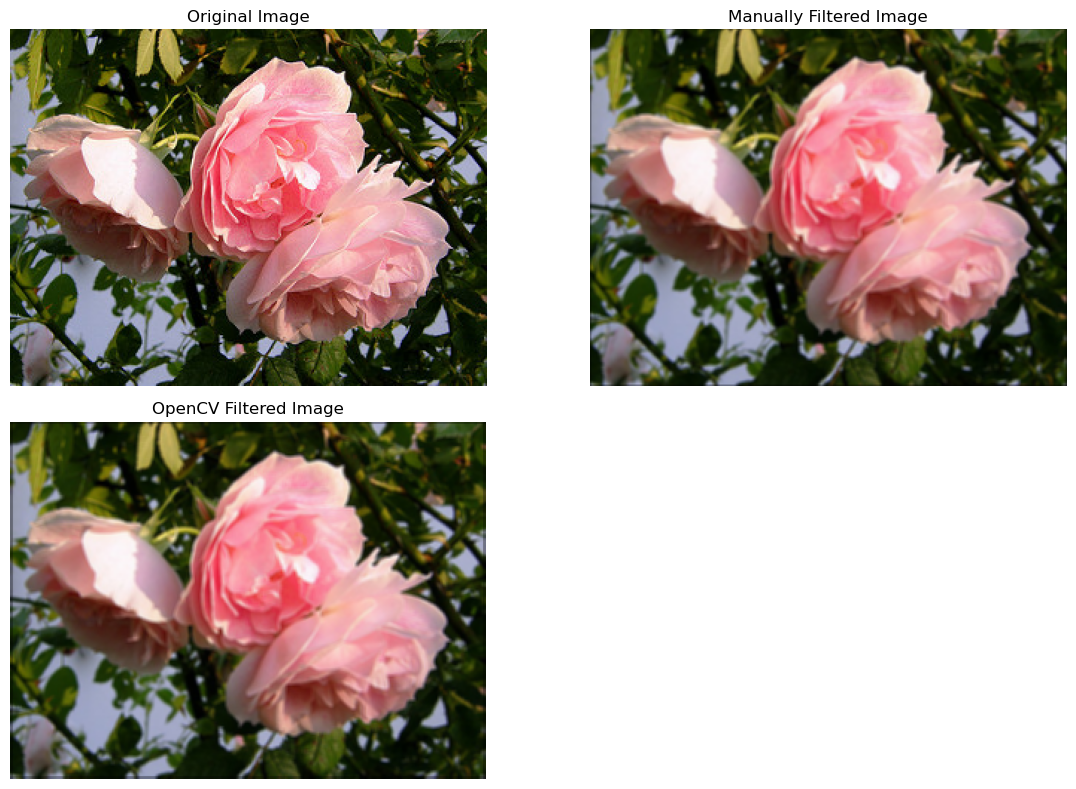

In [4]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load the sample image
image_path = os.path.join(os.getcwd(), 'data', 'images', 'roses.jpg')  # Replace with your image path
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB if needed

# Step 2: Apply zero padding (extend by 1 pixel on each side) to make it larger
padded_image = np.pad(image, ((1, 1), (1, 1), (0, 0)), mode='constant', constant_values=0)

# Step 3: Define a function to apply the 3x3 average filter manually
def apply_average_filter_manual(channel):
    kernel = np.ones((3, 3), dtype=np.float32) / 9  # 3x3 average kernel
    filtered = np.zeros_like(channel, dtype=np.float32)
    # Apply the filter manually
    for i in range(1, channel.shape[0] - 1):
        for j in range(1, channel.shape[1] - 1):
            filtered[i, j] = np.sum(channel[i-1:i+2, j-1:j+2] * kernel)
    return filtered[1:-1, 1:-1]  # Crop the filtered result back to original size

# Step 4: Apply the manual average filter to each channel (R, G, B)
R_channel = padded_image[:, :, 0]
G_channel = padded_image[:, :, 1]
B_channel = padded_image[:, :, 2]

R_filtered_manual = apply_average_filter_manual(R_channel)
G_filtered_manual = apply_average_filter_manual(G_channel)
B_filtered_manual = apply_average_filter_manual(B_channel)

# Step 5: Apply the OpenCV filter using cv2.filter2D
def apply_opencv_filter(channel):
    kernel = np.ones((3, 3), dtype=np.float32) / 9  # 3x3 average kernel
    return cv2.filter2D(channel, -1, kernel)

# Step 6: Apply the OpenCV filter to each channel (R, G, B)
R_filtered_opencv = apply_opencv_filter(R_channel)
G_filtered_opencv = apply_opencv_filter(G_channel)
B_filtered_opencv = apply_opencv_filter(B_channel)

# Step 7: Combine the filtered channels to form the final filtered image for both methods
manual_filtered_image = np.stack([R_filtered_manual, G_filtered_manual, B_filtered_manual], axis=-1)
opencv_filtered_image = np.stack([R_filtered_opencv, G_filtered_opencv, B_filtered_opencv], axis=-1)

# Step 8: Plot the results
plt.figure(figsize=(12, 8))

# Original Image (with padding)
plt.subplot(2, 2, 1)
plt.imshow(image)
plt.title("Original Image")
plt.axis('off')

# Manually Filtered Image
plt.subplot(2, 2, 2)
plt.imshow(manual_filtered_image.astype(np.uint8))
plt.title("Manually Filtered Image")
plt.axis('off')

# OpenCV Filtered Image
plt.subplot(2, 2, 3)
plt.imshow(opencv_filtered_image.astype(np.uint8))
plt.title("OpenCV Filtered Image")
plt.axis('off')

plt.tight_layout()
plt.show()
